# Task 2 - Alkemy

_Lorenzo Antolini, Enrico Grandi, Simone Lu, Enrico Romano_

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_sd = pd.read_csv('sales_cleaned.csv')
# # df_cr = pd.read_csv('clicksreg_cleaned.csv')
df_pc = pd.read_csv('product_catalog.csv')
# df_cb = pd.read_csv('clicks_bidding.csv')

In [3]:
df_sd

,sale_date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,profit,revenue,promotion_perc,month
0,2021-01-02,109751,1,2499.0,2777.0,2082.0,2313.8917,1499.4000,582.6000,2082.0,10.021718,1
1,2021-01-02,110853,1,3990.0,8322.0,3325.0,6935.1852,2833.7000,491.3000,3325.0,52.056075,1
2,2021-01-02,131410,1,2288.0,3767.0,1907.0,3138.8889,1860.0000,47.0000,1907.0,39.246018,1
3,2021-01-02,134294,1,4990.0,6666.0,4158.0,5554.6296,3599.4024,558.5976,4158.0,25.143524,1
4,2021-01-02,134298,1,5990.0,7777.0,4992.0,6480.5583,4199.4000,792.6000,4992.0,22.969600,1
...,...,...,...,...,...,...,...,...,...,...,...,...
114009,2021-12-31,184595,2,3290.0,4433.0,2742.0,3694.4444,2474.2500,267.7500,5484.0,25.780450,12
114010,2021-12-31,184647,1,1990.0,2878.0,1658.0,2398.1481,1638.0000,20.0000,1658.0,30.863319,12
114011,2021-12-31,184749,1,4990.0,5544.0,4158.0,4620.3704,3600.0000,558.0000,4158.0,10.007215,12
114012,2021-12-31,184809,1,2590.0,2878.0,2158.0,2398.1481,1650.0000,508.0000,2158.0,10.013898,12


In [4]:
df_sd['sale_date'] = pd.to_datetime(df_sd['sale_date'],errors = 'coerce',format = '%Y-%m-%d')
df_sd['profit'] = df_sd['profit']*df_sd['quantity']

In [5]:
df_sd_1 = df_sd.copy()

# ABC analysis 
ABC analysis is an inventory management technique that determines the value of inventory items based on their importance to the business. ABC ranks items on demand, cost and risk data, and inventory mangers group items into classes based on those criteria. This helps business leaders understand which products or services are most critical to the financial success of their organization.
The most important stock keeping units (SKUs), based on either sales volume or profitability, are "Class A" items, the next-most important are Class B and the least important are Class C. Some companies may choose a classification system that breaks products into more than just those three groups (A-F, for example).

In [6]:
df_sd_1

,sale_date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,profit,revenue,promotion_perc,month
0,2021-01-02,109751,1,2499.0,2777.0,2082.0,2313.8917,1499.4000,582.6000,2082.0,10.021718,1
1,2021-01-02,110853,1,3990.0,8322.0,3325.0,6935.1852,2833.7000,491.3000,3325.0,52.056075,1
2,2021-01-02,131410,1,2288.0,3767.0,1907.0,3138.8889,1860.0000,47.0000,1907.0,39.246018,1
3,2021-01-02,134294,1,4990.0,6666.0,4158.0,5554.6296,3599.4024,558.5976,4158.0,25.143524,1
4,2021-01-02,134298,1,5990.0,7777.0,4992.0,6480.5583,4199.4000,792.6000,4992.0,22.969600,1
...,...,...,...,...,...,...,...,...,...,...,...,...
114009,2021-12-31,184595,2,3290.0,4433.0,2742.0,3694.4444,2474.2500,535.5000,5484.0,25.780450,12
114010,2021-12-31,184647,1,1990.0,2878.0,1658.0,2398.1481,1638.0000,20.0000,1658.0,30.863319,12
114011,2021-12-31,184749,1,4990.0,5544.0,4158.0,4620.3704,3600.0000,558.0000,4158.0,10.007215,12
114012,2021-12-31,184809,1,2590.0,2878.0,2158.0,2398.1481,1650.0000,508.0000,2158.0,10.013898,12


In [7]:
df_withprodcat = pd.merge(df_sd_1,df_pc, how='left', on=['product_id'] )

In [8]:
df_sd_1.head()

,sale_date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,profit,revenue,promotion_perc,month
0,2021-01-02,109751,1,2499.0,2777.0,2082.0,2313.8917,1499.4000,582.6000,2082.0,10.021718,1
1,2021-01-02,110853,1,3990.0,8322.0,3325.0,6935.1852,2833.7000,491.3000,3325.0,52.056075,1
2,2021-01-02,131410,1,2288.0,3767.0,1907.0,3138.8889,1860.0000,47.0000,1907.0,39.246018,1
3,2021-01-02,134294,1,4990.0,6666.0,4158.0,5554.6296,3599.4024,558.5976,4158.0,25.143524,1
4,2021-01-02,134298,1,5990.0,7777.0,4992.0,6480.5583,4199.4000,792.6000,4992.0,22.969600,1


Variables that we need for ABC Analysis :
- Product_id;
- Quantity;
- Revenue;
- Stock;
- Profit;
- Promotion Percentage.

So, we need to consider also stock's dataset

In [9]:
df_st = pd.read_csv('stock.csv')

In [10]:
df_st['stock_date'] = pd.to_datetime(df_st['stock_date'])

In [11]:
df_withstock = pd.merge(df_withprodcat ,df_st, how='inner', left_on = ['sale_date','product_id'],right_on = ['stock_date','product_id'] )

In [12]:
df_withstock.isnull().sum()/ len(df_withstock) * 100

sale_date            0.0
product_id           0.0
quantity             0.0
sales_price_tax      0.0
regular_price_tax    0.0
sales_price          0.0
regular_price        0.0
purchase_price       0.0
profit               0.0
revenue              0.0
promotion_perc       0.0
month                0.0
coded_cat1           0.0
coded_cat2           0.0
coded_cat3           0.0
coded_brand          0.0
coded_name           0.0
stock_date           0.0
total_stock          0.0
dtype: float64

Let's check for duplicate values: 

In [13]:
df_withstock.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
113204    False
113205    False
113206    False
113207    False
113208    False
Length: 113209, dtype: bool

In [14]:
df_withstock.shape

(113209, 19)

In [15]:
df_withstock.columns

Index(['sale_date', 'product_id', 'quantity', 'sales_price_tax',
       'regular_price_tax', 'sales_price', 'regular_price', 'purchase_price',
       'profit', 'revenue', 'promotion_perc', 'month', 'coded_cat1',
       'coded_cat2', 'coded_cat3', 'coded_brand', 'coded_name', 'stock_date',
       'total_stock'],
      dtype='object')

In [16]:
df_ABC = df_withstock[['sale_date','product_id','quantity','profit','revenue','promotion_perc','total_stock']]
df_ABC

,sale_date,product_id,quantity,profit,revenue,promotion_perc,total_stock
0,2021-01-02,109751,1,582.6000,2082.0,10.021718,12
1,2021-01-02,110853,1,491.3000,3325.0,52.056075,302
2,2021-01-02,131410,1,47.0000,1907.0,39.246018,50
3,2021-01-02,134294,1,558.5976,4158.0,25.143524,54
4,2021-01-02,134298,1,792.6000,4992.0,22.969600,10
...,...,...,...,...,...,...,...
113204,2021-12-31,184592,2,951.5000,6650.0,28.036073,73
113205,2021-12-31,184595,2,535.5000,5484.0,25.780450,79
113206,2021-12-31,184647,1,20.0000,1658.0,30.863319,30
113207,2021-12-31,184749,1,558.0000,4158.0,10.007215,106


Let's divide the dataset in time windows, in order to analyze the popularity of products in different periods

In [17]:
df_ABC['month'] = df_ABC['sale_date'].dt.month
# black_friday = df_ABC[(df_ABC["sale_date"]>="2021-11-01") & (df_ABC['sale_date']<="2021-11-30")]
df_ABC["BLACKFRIDAY"] = [0 if x != 11 else 1 for x in df_ABC['sale_date'].dt.month]

In [18]:
df_ABC

,sale_date,product_id,quantity,profit,revenue,promotion_perc,total_stock,month,BLACKFRIDAY
0,2021-01-02,109751,1,582.6000,2082.0,10.021718,12,1,0
1,2021-01-02,110853,1,491.3000,3325.0,52.056075,302,1,0
2,2021-01-02,131410,1,47.0000,1907.0,39.246018,50,1,0
3,2021-01-02,134294,1,558.5976,4158.0,25.143524,54,1,0
4,2021-01-02,134298,1,792.6000,4992.0,22.969600,10,1,0
...,...,...,...,...,...,...,...,...,...
113204,2021-12-31,184592,2,951.5000,6650.0,28.036073,73,12,0
113205,2021-12-31,184595,2,535.5000,5484.0,25.780450,79,12,0
113206,2021-12-31,184647,1,20.0000,1658.0,30.863319,30,12,0
113207,2021-12-31,184749,1,558.0000,4158.0,10.007215,106,12,0


In [19]:
df_ABC = df_ABC.groupby(['product_id','month']).agg(
                                                                    #orders done every day 
                                                                    orders_x_day=('sale_date', 'count'),
                                                                    #stock level per product
                                                                    total_stock=('total_stock', 'sum'),
                                                                    #sum of quantity sold totally by product
                                                                    quantity=('quantity', 'sum'),
                                                                    #sum of revenue 
                                                                    revenue=('revenue', 'sum'),
                                                                    #promotion percentage, reg price -sale price / reg price
                                                                    promotion_perc = ('promotion_perc', 'mean'), 
                                                                    #profit 
                                                                    profit = ('profit', 'sum')).reset_index()

## Analysis per quarters

In [20]:
df_ABC

,product_id,month,orders_x_day,total_stock,quantity,revenue,promotion_perc,profit
0,100043,1,1,194,1,382.0,10.117647,112.0000
1,100043,3,2,300,2,764.0,10.117647,224.0000
2,100043,12,1,157,1,408.0,10.073469,138.0000
3,100044,2,1,135,1,491.0,9.968834,141.0000
4,100044,3,1,120,1,437.0,19.870972,87.0000
...,...,...,...,...,...,...,...,...
38798,184596,12,4,311,9,29925.0,28.036073,4281.7500
38799,184647,12,4,210,7,11606.0,30.863319,140.0000
38800,184749,12,3,372,5,20790.0,10.007215,2790.0000
38801,184809,12,5,44,12,25056.0,12.015442,5256.0000


Now we have a product dataset that includes total revenue we can create the product ABC classification. We’ll construct a Python function to handle this for us. 

The function works by sorting the Pandas dataframe of customers by the metric column (i.e. revenue) so that the product that is sold the most are at the top of the list. It then calculates the cumulative sum of the total revenue and the running percentage total. It assigns:
- <b>Class A</b>, _to all customers where the cumulative percentage is up to 80%_
- <b>Class B</b>, _to those where the cumulative percentage contribution is between 80% and 90%_
- <b>Class C</b>, _to the rest._

The function returns both the ABC class for each customer and its rank

In [21]:
def abc(df, metric_column, abc_class_name='class'):
    """Assign an ABC class and rank to a metric based on cumulative percentage contribution. 
    
    Args:
        df: Pandas dataframe containing data. 
        metric_column (string): Name of column containing metric to calculate. 
        abc_class_name (string, optional): Name to assign to class column. 
    
    Return:
        Pandas dataframe containing original data, plus the metric class and rank. 
    """
    
    def _abc_segment(percentage):
        """Assign an ABC segment based on cumulative percentage contribution.
        Args:
            percentage (float): Cumulative percentage of ranked metric.
        Returns:
            segments: Pandas DataFrame
        """

        if 0 < percentage <= 80:
            return 'A'
        elif 80 < percentage <= 90:
            return 'B'
        else:
            return 'C'    
    
    data = df.sort_values(by=metric_column, ascending=False)
    data[metric_column+'_sum'] = data[metric_column].sum()
    data[metric_column+'_cumsum'] = data[metric_column].cumsum()
    data[metric_column+'_running_pc'] = (data[metric_column+'_cumsum'] / data[metric_column+'_sum']) * 100
    data[abc_class_name] = data[metric_column+'_running_pc'].apply(_abc_segment)
    data[abc_class_name+'_rank'] = data[metric_column+'_running_pc'].rank().astype(int)
    data.drop([metric_column+'_sum', metric_column+'_cumsum', metric_column+'_running_pc'], axis=1, inplace=True)
    return data


Finally, we can use the function to segment our products. We ’ll pass in the Pandas dataframe containing the products and we’ll define the metric column as the revenue, and we’ll call the ABC class abc_class.

In [22]:
df_ABC_metric = pd.DataFrame()
for month in set(df_ABC['month']):
    df_metric_1 = pd.DataFrame()
    df_metric_2 = pd.DataFrame()
    df_classrev = pd.DataFrame()
    df_classprof = pd.DataFrame()
    df_classqt = pd.DataFrame()
    #select quarter
    df_quarter = df_ABC[df_ABC["month"]==month]
    #perform abc analysis revenues
    df_classrev = abc(df_quarter, 'revenue', 'abc_class')[['product_id',"total_stock","quantity","revenue",'month','abc_class','abc_class_rank']]
    df_classrev.columns = ['product_id',"total_stock","quantity","revenue",'month','class_revenue', 'class_rank_revenue']
    #perform abc analysis profit
    df_classprof = abc(df_quarter, 'profit', 'abc_class')[['product_id',"total_stock","quantity","revenue",'month','abc_class','abc_class_rank']]
    df_classprof.columns = ['product_id',"total_stock","quantity","revenue",'month','class_profit', 'class_rank_profit']
    #perform abc analysis quantity
    df_classqt = abc(df_quarter, 'quantity', 'abc_class')[['product_id',"total_stock","quantity","revenue",'month','abc_class','abc_class_rank']]
    df_classqt.columns = ['product_id',"total_stock","quantity","revenue",'month','class_quantity', 'class_rank_quantity']
    #merge the metrics
    df_metric_1 = pd.merge(df_classprof,df_classrev, how = 'left', on = ['product_id','month',])
    df_metric_2 = pd.merge(df_metric_1,df_classqt, how = 'left', on = ['product_id','month',])
    #we transformed the class rank profit with a power of -1, in order to give high value to rank 1 (best product) and fewer value to the last product(rank>5000)
    df_metric_2['P_rank_norm'] = (((df_metric_2['class_rank_profit']).astype(float))**(-1))*100
    df_metric_2['R_rank_norm'] = (((df_metric_2['class_rank_revenue']).astype(float))**(-1))*100
    df_metric_2['Q_rank_norm'] = (((df_metric_2['class_rank_quantity']).astype(float))**(-1))*100
    #so then we combine the three value with the formula 0,35*profit+0,05*revenue+0,6*quantity, in order to take information from margin and demand
    df_metric_2['Pop_Index'] = ((0.35*df_metric_2['P_rank_norm'])+(0.05*df_metric_2['R_rank_norm'])+(0.60*df_metric_2['Q_rank_norm']))


    df_ABC_metric = df_ABC_metric.append(df_metric_2)
    df_ABC_metric = df_ABC_metric[['product_id', 'month',
       'class_profit', 'class_rank_profit',  
       'class_revenue', 'class_rank_revenue', 'total_stock',
       'quantity', 'revenue', 'class_quantity', 'class_rank_quantity',
       'P_rank_norm', 'R_rank_norm', 'Q_rank_norm', 'Pop_Index']]
    #df_ABC_metric = df_ABC_metric.groupby(["product_id",'quarter']).first().reset_index().fillna(0)

In [23]:
df_ABC_metric = df_ABC_metric.sort_values(by='Pop_Index',ascending=False)
df_ABC_metric

# how do they vary based on the quarter 

,product_id,month,class_profit,class_rank_profit,class_revenue,class_rank_revenue,total_stock,quantity,revenue,class_quantity,class_rank_quantity,P_rank_norm,R_rank_norm,Q_rank_norm,Pop_Index
1,177925,12,A,2,A,4,28317,264,2059522.0,A,1,50.000000,25.000000,100.000000,78.750000
3,110853,1,A,4,A,16,3792,145,482125.0,A,1,25.000000,6.250000,100.000000,69.062500
0,160649,7,A,1,A,2,2536,184,2595634.0,A,2,100.000000,50.000000,50.000000,67.500000
5,110853,2,A,6,A,13,9127,128,402171.0,A,1,16.666667,7.692308,100.000000,66.217949
3271,112582,6,C,857,A,1,17346,244,4504284.0,A,1,0.116686,100.000000,100.000000,65.040840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,153830,12,C,3417,C,3551,30,1,332.0,C,3585,0.029265,0.028161,0.027894,0.028387
3073,159960,12,C,3564,C,3323,3,1,1242.0,C,3520,0.028058,0.030093,0.028409,0.028371
3112,154108,12,C,3567,C,3336,31,1,1182.0,C,3521,0.028035,0.029976,0.028401,0.028352
3157,155850,11,C,3561,C,3498,281,1,516.0,C,3520,0.028082,0.028588,0.028409,0.028304


In [24]:
df_ABC_metric_quarter = df_ABC_metric.groupby(['class_profit','class_quantity','class_revenue',"month"]).mean().sort_values(by='Pop_Index',ascending=False)
df_ABC_metric_quarter

product_id  \
class_profit class_quantity class_revenue month                  
A            A              A             6      148187.972851   
                                          7      147551.888136   
                                          3      141819.716088   
                                          12     154715.591463   
                                          1      140961.910082   
...                                                        ...   
C            C              C             8      140650.538375   
                                          4      136832.476239   
                                          12     140493.313926   
                                          3      135251.328056   
                                          11     141029.370464   

                                                 class_rank_profit  \
class_profit class_quantity class_revenue month                      
A            A              A             6             118.000000   
                                          7             169.437288   
                                          3             195.690852   
                                          12            188.381098   
                                          1             213.354223   
...                                                            ...   
C            C              C             8            2323.024831   
                                          4            2450.486350   
                                          12           2466.564910   
                                          3            2540.194371   
                                          11           2535.388186   

                                                 class_rank_revenue  \
class_profit class_quantity class_revenue month                       
A            A              A             6              240.194570   
                                          7              248.559322   
                                          3              312.851735   
                                          12             293.817073   
                                          1              245.422343   
...                                                             ...   
C            C              C             8             2459.041761   
                                          4             2561.348837   
                                          12            2651.142408   
                                          3             2669.497801   
                                          11            2671.875949   

                                                 total_stock   quantity  \
class_profit class_quantity class_revenue month                           
A            A              A             6      1076.493213  13.339367   
                                          7       848.427119  15.684746   
                                          3      1390.728707  16.340694   
                                          12     1850.454268  19.506098   
                                          1       979.051771   9.942779   
...                                                      ...        ...   
C            C              C             8        79.959368   1.000000   
                                          4        85.849343   1.033367   
                                          12      149.579072   1.276161   
                                          3       114.800352   1.279683   
                                          11      104.111392   1.174684   

                                                       revenue  \
class_profit class_quantity class_revenue month                  
A            A              A             6      237972.613122   
                                          7      232470.633898   
                                          3      198276.255521   
                                          12     268

In [25]:
df_ABC_metric_quarter.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 318 entries, ('A', 'A', 'A', 6) to ('C', 'C', 'C', 11)
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           318 non-null    float64
 1   class_rank_profit    318 non-null    float64
 2   class_rank_revenue   318 non-null    float64
 3   total_stock          318 non-null    float64
 4   quantity             318 non-null    float64
 5   revenue              318 non-null    float64
 6   class_rank_quantity  318 non-null    float64
 7   P_rank_norm          318 non-null    float64
 8   R_rank_norm          318 non-null    float64
 9   Q_rank_norm          318 non-null    float64
 10  Pop_Index            318 non-null    float64
dtypes: float64(11)
memory usage: 29.0+ KB


In [26]:
# top10 = df_ABC_metric_quarter.head(10)
# top10

In [27]:
# top10 = top10.reset_index()
# top10

In [28]:
df_ABC_metric_quarter = df_ABC_metric.groupby(['class_profit','class_quantity','class_revenue',"month"]).agg(
    {"product_id":"count",
    "total_stock":"sum",
    "quantity":"sum",
    "revenue":"sum",
    "P_rank_norm":"mean",
    "R_rank_norm":"mean",
    "Q_rank_norm":"mean",
    "Pop_Index":"mean"})
df_ABC_metric_quarter.sort_values(by='Pop_Index',ascending=False)
df_ABC_metric_quarter = df_ABC_metric_quarter.reset_index()
df_ABC_metric_quarter["CLASS"] = (df_ABC_metric_quarter["class_profit"]).astype(str)+ (df_ABC_metric_quarter["class_quantity"]).astype(str) +(df_ABC_metric_quarter["class_revenue"]).astype(str)
df_ABC_metric_quarter

,class_profit,class_quantity,class_revenue,month,product_id,total_stock,quantity,revenue,P_rank_norm,R_rank_norm,Q_rank_norm,Pop_Index,CLASS
0,A,A,A,1,367,359312,3649,53114632.5,1.737238,1.426300,1.429217,1.536879,AAA
1,A,A,A,2,386,313450,3097,49788811.5,1.658606,1.503681,1.192628,1.371273,AAA
2,A,A,A,3,317,440861,5180,62853573.0,1.935504,1.477651,1.386872,1.583432,AAA
3,A,A,A,4,428,428704,4592,69810775.0,1.521091,1.426610,1.117514,1.274221,AAA
4,A,A,A,5,407,276715,3119,49084995.5,1.571406,1.479061,0.947415,1.192394,AAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,C,C,C,8,886,70844,886,4549207.0,0.048219,0.043610,0.037291,0.041432,CCC
314,C,C,C,9,932,79753,932,5225839.0,0.049658,0.044288,0.038048,0.042424,CCC
315,C,C,C,10,785,81488,785,3261137.0,0.046946,0.043793,0.038938,0.041983,CCC
316,C,C,C,11,1185,123372,1392,7513962.0,0.044378,0.040253,0.035351,0.038755,CCC


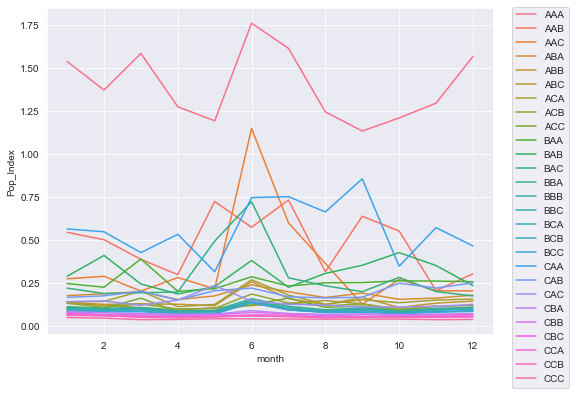

In [45]:
plt.figure(figsize=(8,6))
_=sns.lineplot(data=df_ABC_metric_quarter
            , x="month",
             y="Pop_Index",
             hue = "CLASS")

_=plt.legend(bbox_to_anchor = (1.03, 1.02), fontsize = 10)

In [30]:
# sns.lineplot(data=df_ABC_metric_quarter[(df_ABC_metric_quarter["class_profit"]== "A")& (df_ABC_metric_quarter["class_quantity"]== "A")& (df_ABC_metric_quarter["class_revenue"]== "A")]
# , x="month", y="Pop_Index",color='green').set(title='Popularity index for products of class A-A-A')

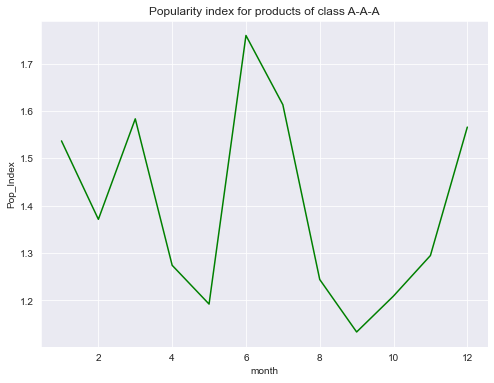

In [31]:
plt.figure(figsize=(8,6))



sns.set_style("darkgrid")
ax=sns.lineplot(data=df_ABC_metric_quarter[(df_ABC_metric_quarter["class_profit"]== "A")& (df_ABC_metric_quarter["class_quantity"]== "A")& (df_ABC_metric_quarter["class_revenue"]== "A")]
            , x="month", y="Pop_Index",color='green').set(title='Popularity index for products of class A-A-A')

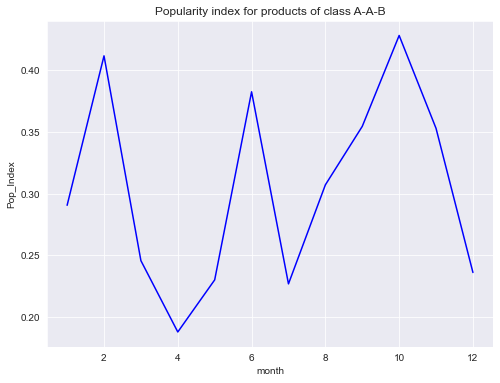

In [32]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
ax=sns.lineplot(data=df_ABC_metric_quarter[(df_ABC_metric_quarter["class_profit"]== "B")& (df_ABC_metric_quarter["class_quantity"]== "A")& (df_ABC_metric_quarter["class_revenue"]== "B")]
            , x="month", y="Pop_Index",color='blue').set(title='Popularity index for products of class A-A-B')

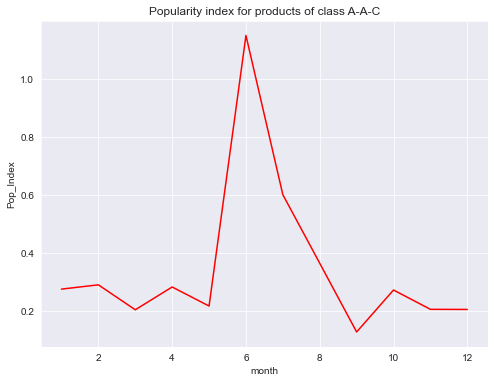

In [33]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
ax=sns.lineplot(data=df_ABC_metric_quarter[(df_ABC_metric_quarter["class_profit"]== "A")& (df_ABC_metric_quarter["class_quantity"]== "A")& (df_ABC_metric_quarter["class_revenue"]== "C")]
            , x="month", y="Pop_Index",color='red').set(title='Popularity index for products of class A-A-C')


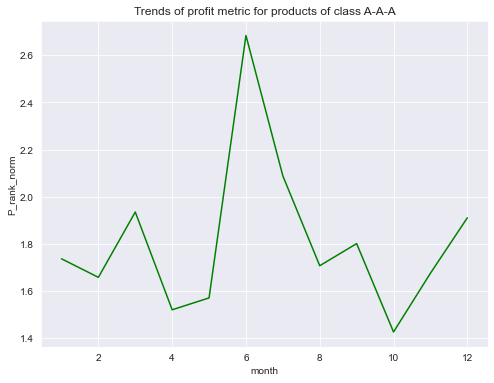

In [34]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
ax=sns.lineplot(data=df_ABC_metric_quarter[(df_ABC_metric_quarter["class_profit"]== "A")& (df_ABC_metric_quarter["class_quantity"]== "A")& (df_ABC_metric_quarter["class_revenue"]== "A")]
            , x="month", y="P_rank_norm",color='green').set(title='Trends of profit metric for products of class A-A-A')


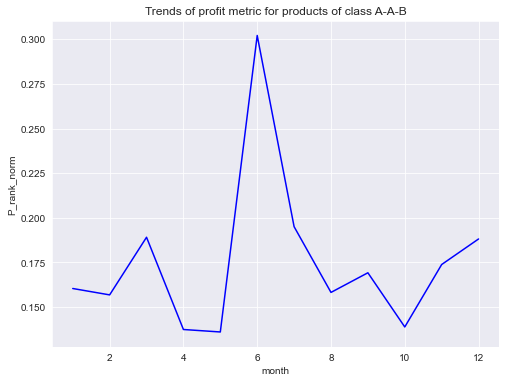

In [35]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
ax=sns.lineplot(data=df_ABC_metric_quarter[(df_ABC_metric_quarter["class_profit"]== "B")& (df_ABC_metric_quarter["class_quantity"]== "A")& (df_ABC_metric_quarter["class_revenue"]== "B")]
            , x="month", y="P_rank_norm",color='blue').set(title='Trends of profit metric for products of class A-A-B')


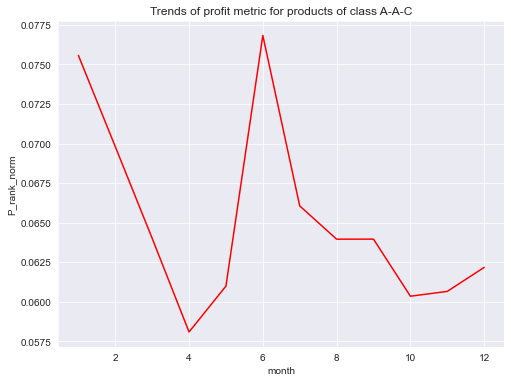

In [36]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
ax=sns.lineplot(data=df_ABC_metric_quarter[(df_ABC_metric_quarter["class_profit"]== "C")& (df_ABC_metric_quarter["class_quantity"]== "A")& (df_ABC_metric_quarter["class_revenue"]== "C")]
            , x="month", y="P_rank_norm",color='red').set(title='Trends of profit metric for products of class A-A-C')


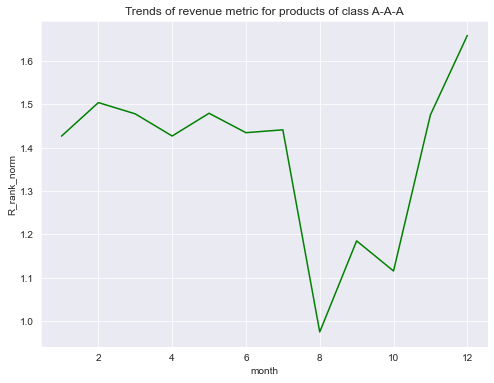

In [37]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
ax=sns.lineplot(data=df_ABC_metric_quarter[(df_ABC_metric_quarter["class_profit"]== "A")& (df_ABC_metric_quarter["class_quantity"]== "A")& (df_ABC_metric_quarter["class_revenue"]== "A")]
            , x="month", y="R_rank_norm",color='green').set(title='Trends of revenue metric for products of class A-A-A')


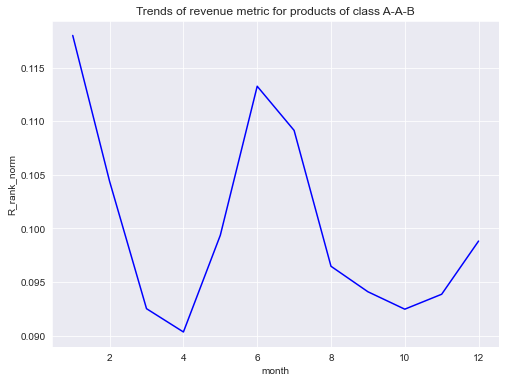

In [38]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
ax=sns.lineplot(data=df_ABC_metric_quarter[(df_ABC_metric_quarter["class_profit"]== "B")& (df_ABC_metric_quarter["class_quantity"]== "A")& (df_ABC_metric_quarter["class_revenue"]== "B")]
            , x="month", y="R_rank_norm",color='blue').set(title='Trends of revenue metric for products of class A-A-B')


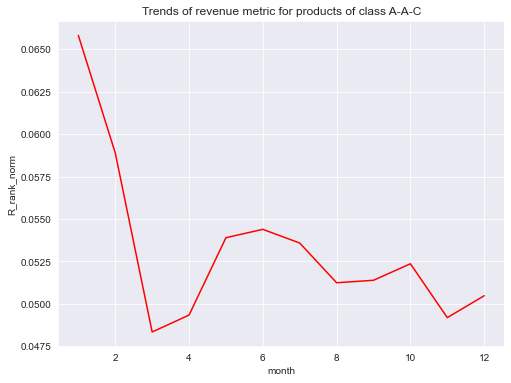

In [39]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
ax=sns.lineplot(data=df_ABC_metric_quarter[(df_ABC_metric_quarter["class_profit"]== "C")& (df_ABC_metric_quarter["class_quantity"]== "A")& (df_ABC_metric_quarter["class_revenue"]== "C")]
            , x="month", y="R_rank_norm",color='red').set(title='Trends of revenue metric for products of class A-A-C')


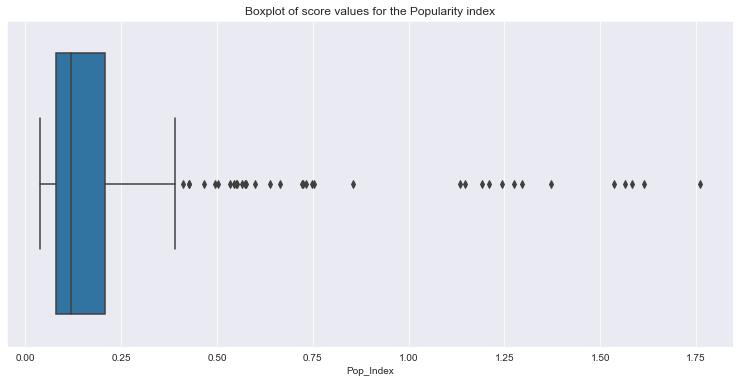

In [40]:
#Pop_Index's boxplot
plt.figure(figsize=(13,6))
sns.set_style("darkgrid")
_=sns.boxplot(data=df_ABC_metric_quarter, x='Pop_Index').set(title='Boxplot of score values for the Popularity index')

In [41]:
df_ABC_metric_quarter

,class_profit,class_quantity,class_revenue,month,product_id,total_stock,quantity,revenue,P_rank_norm,R_rank_norm,Q_rank_norm,Pop_Index,CLASS
0,A,A,A,1,367,359312,3649,53114632.5,1.737238,1.426300,1.429217,1.536879,AAA
1,A,A,A,2,386,313450,3097,49788811.5,1.658606,1.503681,1.192628,1.371273,AAA
2,A,A,A,3,317,440861,5180,62853573.0,1.935504,1.477651,1.386872,1.583432,AAA
3,A,A,A,4,428,428704,4592,69810775.0,1.521091,1.426610,1.117514,1.274221,AAA
4,A,A,A,5,407,276715,3119,49084995.5,1.571406,1.479061,0.947415,1.192394,AAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,C,C,C,8,886,70844,886,4549207.0,0.048219,0.043610,0.037291,0.041432,CCC
314,C,C,C,9,932,79753,932,5225839.0,0.049658,0.044288,0.038048,0.042424,CCC
315,C,C,C,10,785,81488,785,3261137.0,0.046946,0.043793,0.038938,0.041983,CCC
316,C,C,C,11,1185,123372,1392,7513962.0,0.044378,0.040253,0.035351,0.038755,CCC


In [42]:

df_ABC_metric_quarter.groupby("CLASS").sum()


,month,product_id,total_stock,quantity,revenue,P_rank_norm,R_rank_norm,Q_rank_norm,Pop_Index
CLASS,,,,,,,,,
AAA,78,4316,4175761,48015,756091045.0,21.719749,16.597332,13.911934,16.778939
AAB,78,457,768093,4007,13901147.5,3.713521,1.257150,7.381738,5.791632
AAC,78,92,192401,710,1447077.0,3.113188,0.866379,5.108946,4.198302
ABA,78,605,48371,1285,40766970.0,4.668608,2.549508,0.737935,2.204249
ABB,78,136,11796,259,4126603.0,3.569387,1.264687,0.728677,1.749726
ABC,55,21,3662,37,351738.0,1.815021,0.592403,0.495274,0.962042
ACA,78,206,5639,258,9730085.0,4.321185,1.928656,0.509383,1.914477
ACB,78,218,7175,231,6739397.0,3.266785,1.268293,0.467113,1.487057
ACC,60,26,725,26,424120.0,2.434619,0.729105,0.410444,1.134838


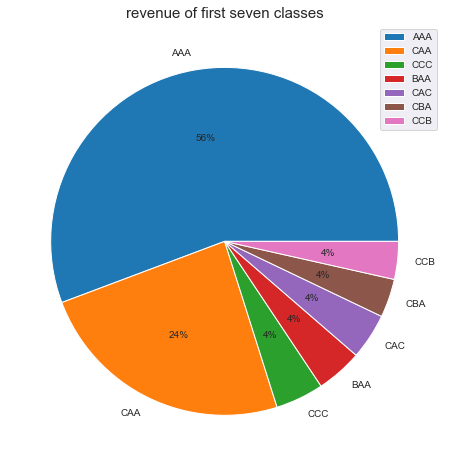

In [43]:
plt.figure(figsize=(10,8))

pie = df_ABC_metric_quarter.groupby("CLASS").sum()["revenue"].reset_index().sort_values("revenue",ascending=False)[0:7]
plt.pie(pie["revenue"],labels=pie["CLASS"], autopct='%.0f%%')
plt.title('revenue of first seven classes',fontsize='15')
plt.legend()

plt.show()

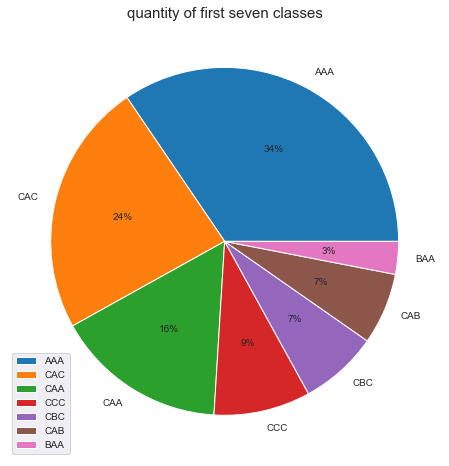

In [44]:
plt.figure(figsize=(10,8))

pie = df_ABC_metric_quarter.groupby("CLASS").sum()["quantity"].reset_index().sort_values("quantity",ascending=False)[0:7]
plt.pie(pie["quantity"],labels=pie["CLASS"], autopct='%.0f%%')
plt.title('quantity of first seven classes',fontsize='15')
plt.legend()

plt.show()